# KEGG vs BEL gene sets comparison

### This notebook calculates the Jaccard index for gene sets in the KEGG PATHWAY database and gene sets in BEL graphs for each pathway in the KEGG PATHWAY database

In [1]:
import os
import itertools as itt
from collections import defaultdict
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pybel import BELGraph, from_pickle

from pathme.constants import KEGG_BEL
from pathme.utils import get_files_in_folder
from pathme.utils import get_files_in_folder, get_genes_from_pickles, get_genes_in_graph, jaccard_similarity

from bio2bel_kegg.manager import Manager

In [2]:
# Initiate KEGG Manager
kegg_manager = Manager()

### Get gene sets for each KEGG pathway in the KEGG PATHWAY database.

In [3]:
kegg_genes_set = kegg_manager.export_gene_sets()

### Get gene sets for each KEGG pathway BEL graph

In [4]:
# Get list of BEL graph pickles
pickles = get_files_in_folder(KEGG_BEL)

In [5]:
def get_genes_from_pickles(pickles):
    """Get BEL graph gene set for all KEGG pathways.

    :param list pickles: list of BEL graph pickles
    :return: BEL graph gene sets for each KEGG pathway 
    :rtype: dict[str,set]
    """
    pathway_genes_dict = {}
    
    for file_name in pickles:
        
        # Flattened graphs considered for gene sets 
        if file_name.endswith('_flatten.pickle'):
            graph = from_pickle(os.path.join(KEGG_BEL,file_name))
            
            # Get gene set for pathway 
            gene_set = get_genes_in_graph(graph) 
            file_name = file_name.strip('_flatten.pickle')
            file_name = 'path:' + file_name
            file_name = kegg_manager.get_pathway_by_id(file_name)

            pathway_genes_dict[str(file_name)] = gene_set
                
    return pathway_genes_dict


In [6]:
def get_genes_in_graph(graph):
    """Get BEL graph gene set for a KEGG pathway.

    :param pybel.BELGraph graph: BEL Graph
    :return: BEL graph gene set  
    :rtype: set
    """
    gene_set = set()
    
    for node, data in graph.nodes(data=True):
        if node.function in {'Protein', 'RNA'} and node.namespace == 'HGNC':
            gene_set.add(node.name)
            
    return gene_set

In [7]:
bel_genes_set = get_genes_from_pickles(pickles)

### For each pathway in the KEGG PATHWAY database, calculate the Jaccard index for gene sets from the database and from BEL graphs 

In [8]:
jaccard_similarities = jaccard_similarity(kegg_genes_set, bel_genes_set)

### Visualize Jaccard index distribution

/home/sarah/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


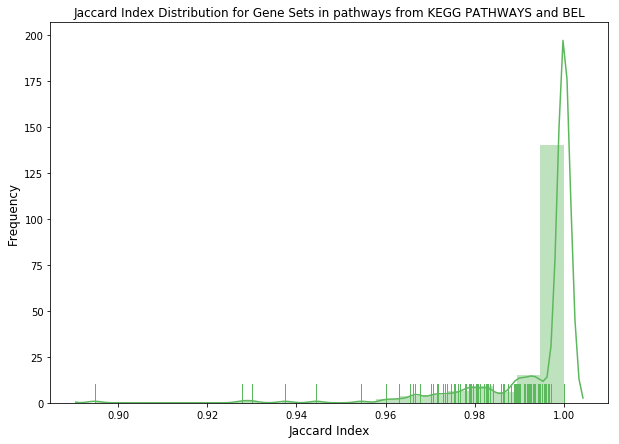

In [9]:
plt.figure(figsize=(10,7))
plt.title('Jaccard Index Distribution for Gene Sets in pathways from KEGG PATHWAYS and BEL', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Jaccard Index', fontsize=12)

sns.distplot(jaccard_similarities, axlabel='Jaccard Index', rug=True, bins=20, color='#5cb85c')
